# **Simple APIs for Data Analysis Practice**

## **Random User and Fruitvice API Examples**

Created on Wed Jul 29 12:33:46 2022

@author: David K. Jeremiah


## **Objectives**

This lab is aimed at loading and exploring Simple APIs, such as:

*   RandomUser API, using `RandomUser()` Python library
*   Fruitvice API, using `requests` Python library


## **Overview on APIs**

API is the acronym for **Application Programming Interface**. Basically, it is a ***software intermediary*** or ***gateway*** that allows two applications to talk to each other. As a Data Analyst, you might be required to work with API's. Some common API's that you're likely to work with include Browser API, REST API and Sensor-Based API

One of the applications we will use in this notebook is ***Random User Generator***. 

**RandomUser** is a free, [open-source](https://github.com/RandomAPI/Randomuser.me-Node) API that provides developers with randomly generated users data to be used as placeholders for testing purposes. This makes the tool similar to ***Lorem Ipsum***, but is a placeholder for people instead of text. The API can return multiple results, as well as specify generated user details such as gender, email, image, username, address, title, first and last name, and more. More information on [RandomUser](https://randomuser.me/) can be found here.

Another example of simple API that is used in this notebook is ***Fruityvice API***. 

The **Fruityvice** API is a powerful webservice which provides data for all kinds of fruit! You can use Fruityvice to find out interesting information about fruit and educate yourself. The webservice is completely free to use and contribute to. Check out more information about this awesome api here: [Fruityvice](https://www.fruityvice.com).

Now, let's explore our first API...


## **1. RandomUser API**

Below are Get Methods parameters that we can generate with this API:

### **Get Methods**

*   get_cell()
*   get_city()
*   get_dob()
*   get_email()
*   get_first_name()
*   get_full_name()
*   get_gender()
*   get_id()
*   get_id_number()
*   get_id_type()
*   get_info()
*   get_last_name()
*   get_login_md5()
*   get_login_salt()
*   get_login_sha1()
*   get_login_sha256()
*   get_nat()
*   get_password()
*   get_phone()
*   get_picture()
*   get_postcode()
*   get_registered()
*   get_state()
*   get_street()
*   get_username()
*   get_zipcode()

To start using the API you can install the `randomuser` library running the `pip install` command.


In [1]:
#!pip install randomuser

Next, we will load the necessary libraries.

In [10]:
# import the necessary libraries
from randomuser import RandomUser
import pandas as pd
import urllib.request as ur
from PIL import Image

First, we will create a random user object, let's call it `r`.

In [3]:
# Create a random user object
r = RandomUser()

Then, using `generate_users()` function, we generate a list of ten (10) random users.

In [4]:
# Generate a list of 10 random users
some_users = r.generate_users(10)

# print list
print(some_users)

[<randomuser.RandomUser object at 0x000002103C87F790>, <randomuser.RandomUser object at 0x000002103C97F610>, <randomuser.RandomUser object at 0x000002103C97FBB0>, <randomuser.RandomUser object at 0x000002103C97F580>, <randomuser.RandomUser object at 0x000002103C97FE20>, <randomuser.RandomUser object at 0x000002103C97FEB0>, <randomuser.RandomUser object at 0x000002103C97FFD0>, <randomuser.RandomUser object at 0x000002103C97FF40>, <randomuser.RandomUser object at 0x000002103C97F520>, <randomuser.RandomUser object at 0x000002103C960D30>]


The "Get Methods" functions mentioned at the beginning of this notebook, can generate the required parameters to construct a dataset. For example, to get full name, we call get_full_name() function.

In [5]:
name = r.get_full_name()
print(name)

Amelia Lefebvre


Let's say we only need 10 users with full names, gender, email addresses, and their phone numbers. We can write a "for-loop" to print these 10 users.

In [7]:
for user in some_users:
    print(user.get_full_name(), ", ", user.get_gender(), ", ", user.get_phone(), ", ", user.get_email())

Eino Ramo ,  male ,  07-383-410 ,  eino.ramo@example.com
Noah Burton ,  male ,  031-629-2850 ,  noah.burton@example.com
Etienne Margaret ,  male ,  320-106-8178 ,  etienne.margaret@example.com
Claudia Terry ,  female ,  08-3978-5923 ,  claudia.terry@example.com
John Rojas ,  male ,  997-568-688 ,  john.rojas@example.com
Jar Turner ,  male ,  015396 89595 ,  jar.turner@example.com
Amanda Laurila ,  female ,  06-070-751 ,  amanda.laurila@example.com
Boyke Cats ,  male ,  (0443) 418229 ,  boyke.cats@example.com
Martinha Duarte ,  female ,  (57) 4629-4411 ,  martinha.duarte@example.com
Amélie Roussel ,  female ,  075 545 43 08 ,  amelie.roussel@example.com


We can see that the above takes the shape of a Dataset, detailing each users full name, gender, phone number and email address.

Let's try something fun. Let's say we want to generate 5 random user pictures from the same list.

In [8]:
for user in some_users[0:5]:
    print(user.get_picture())

https://randomuser.me/api/portraits/men/19.jpg
https://randomuser.me/api/portraits/men/72.jpg
https://randomuser.me/api/portraits/men/37.jpg
https://randomuser.me/api/portraits/women/23.jpg
https://randomuser.me/api/portraits/men/53.jpg


When you copy and paste the hyperlinks above (that has been printed out) in the address bar of a web-browser, you'll get a picture of each user. But let's view one of the picture using the `PIL` and `urllib` libraries.

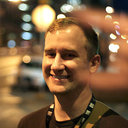

In [11]:
# save image as '19.jpg' in your current working directory
ur.urlretrieve('https://randomuser.me/api/portraits/men/19.jpg', '19.jpg')

# view image
Image.open('19.jpg')

To generate a table with information about the users, we can write a function containing all desirable parameters. For example, 'name', 'gender', 'city', etc. The parameters will depend on the requirements of the test to be performed. 

We call the Get Methods, listed at the beginning of this notebook. Then, we return pandas dataframe with the users.

In [22]:
def get_users():
    users =[]
     
    for user in RandomUser.generate_users(10):
        users.append(
            {"Name":user.get_full_name(),
            "Gender":user.get_gender(),
            "City":user.get_city(),
            "State":user.get_state(),
            "Email":user.get_email(), 
            "DOB":user.get_dob(),
            "Picture":user.get_picture()}
            )
      
    return users     

In [23]:
# calling function
get_users()

[{'Name': 'Hudson Hughes',
  'Gender': 'male',
  'City': 'Nelson',
  'State': 'Taranaki',
  'Email': 'hudson.hughes@example.com',
  'DOB': '1957-06-07T00:20:21.843Z',
  'Picture': 'https://randomuser.me/api/portraits/men/28.jpg'},
 {'Name': 'Kimberly Hawkins',
  'Gender': 'female',
  'City': 'Ely',
  'State': 'Devon',
  'Email': 'kimberly.hawkins@example.com',
  'DOB': '1982-07-30T07:09:21.582Z',
  'Picture': 'https://randomuser.me/api/portraits/women/70.jpg'},
 {'Name': 'Maëlia Da Silva',
  'Gender': 'female',
  'City': 'Lyon',
  'State': 'Var',
  'Email': 'maelia.dasilva@example.com',
  'DOB': '1946-10-26T20:56:38.953Z',
  'Picture': 'https://randomuser.me/api/portraits/women/27.jpg'},
 {'Name': 'Norah Marie',
  'Gender': 'female',
  'City': 'Mulhouse',
  'State': 'Marne',
  'Email': 'norah.marie@example.com',
  'DOB': '1962-09-03T21:34:36.173Z',
  'Picture': 'https://randomuser.me/api/portraits/women/85.jpg'},
 {'Name': 'Benjamin Hansen',
  'Gender': 'male',
  'City': 'Klitmøller',


In [24]:
# create dataframe
df1 = pd.DataFrame(get_users())  

# print the first 5 rows
print(df1.head())

             Name  Gender                  City               State  \
0    Aubree Scott  female            Cumberland    British Columbia   
1  Kayla Reynolds  female               Lincoln               Essex   
2    Eline Thomas  female          Saint-Pierre  Meurthe-et-Moselle   
3  Anolido Moraes    male  Vitória da Conquista      Rio de Janeiro   
4    Sara Edwards  female                 Ardee               Laois   

                        Email                       DOB  \
0    aubree.scott@example.com  1954-06-22T04:23:56.484Z   
1  kayla.reynolds@example.com  1963-12-06T07:48:43.974Z   
2    eline.thomas@example.com  1956-12-09T13:44:32.715Z   
3  anolido.moraes@example.com  1957-11-26T23:24:00.643Z   
4    sara.edwards@example.com  1991-11-25T11:09:27.564Z   

                                            Picture  
0  https://randomuser.me/api/portraits/women/17.jpg  
1  https://randomuser.me/api/portraits/women/69.jpg  
2  https://randomuser.me/api/portraits/women/83.jpg  
3 

Now we have a pandas dataframe that can be used for any testing and analysis purposes that the tester might have.

## **2. Fruityvice API**

Another common way to use APIs, is through the requests library. The part of the lab will contain more information about requests.

We will start by importing all required libraries.

In [16]:
import requests
import json

We will obtain the fruitvice API data using `requests.get("url")` function. The data is in a json format.

In [17]:
data = requests.get("https://www.fruityvice.com/api/fruit/all")

**Note**: Currently the webservice consists of two functions: receiving data for a ***specific fruit*** or ***all fruit***, and a function to add your own data. 

To receive needed data, you have to make a HTTP GET call on the resource `/api/fruit/all` or `/api/fruit/{ID}` or `/api/fruit/{name}` of this website's IP. To add data, make a HTTP PUT call on the resource /api/fruit with the data of a fruit in JSON format in the request body. An ID does not have to be provided. A full documentation for the REST API can be found [here](https://www.fruityvice.com/doc/index.html).

An example of what the response body would look like, for receiving data for ***all*** fruit, can be seen below.

We will retrieve results using `json.loads()` function.

In [19]:
results = json.loads(data.text)

**Note:** You can get the same result using `data.json()` from the requests library, where data is the variable we created above.

Next, we will convert our json data into pandas data frame.

In [20]:
pd.DataFrame(results)

,genus,name,id,family,order,nutritions
0,Malus,Apple,6,Rosaceae,Rosales,"{'carbohydrates': 11.4, 'protein': 0.3, 'fat':..."
1,Prunus,Apricot,35,Rosaceae,Rosales,"{'carbohydrates': 3.9, 'protein': 0.5, 'fat': ..."
2,Musa,Banana,1,Musaceae,Zingiberales,"{'carbohydrates': 22, 'protein': 1, 'fat': 0.2..."
3,Rubus,Blackberry,64,Rosaceae,Rosales,"{'carbohydrates': 9, 'protein': 1.3, 'fat': 0...."
4,Fragaria,Blueberry,33,Rosaceae,Rosales,"{'carbohydrates': 5.5, 'protein': 0, 'fat': 0...."
5,Prunus,Cherry,9,Rosaceae,None,"{'carbohydrates': 12, 'protein': 1, 'fat': 0.3..."
6,Durio,Durian,60,Malvaceae,Malvales,"{'carbohydrates': 27.1, 'protein': 1.5, 'fat':..."
7,Ficus,Fig,68,Moraceae,Rosales,"{'carbohydrates': 19, 'protein': 0.8, 'fat': 0..."
8,Ribes,Gooseberry,69,Grossulariaceae,Saxifragales,"{'carbohydrates': 10, 'protein': 0.9, 'fat': 0..."
9,Vitis,Grapes,47,Vitaceae,Vitales,"{'carbohydrates': 18.1, 'protein': 0.72, 'fat'..."


The result is in a nested json format. The 'nutrition' column contains multiple subcolumns, so the data needs to be 'flattened' or normalized.

In [21]:
# normalizing dataframe
df2 = pd.json_normalize(results)

# printing the first 5 rows
print(df2.head())

      genus        name  id    family         order  nutritions.carbohydrates  \
0     Malus       Apple   6  Rosaceae       Rosales                      11.4   
1    Prunus     Apricot  35  Rosaceae       Rosales                       3.9   
2      Musa      Banana   1  Musaceae  Zingiberales                      22.0   
3     Rubus  Blackberry  64  Rosaceae       Rosales                       9.0   
4  Fragaria   Blueberry  33  Rosaceae       Rosales                       5.5   

   nutritions.protein  nutritions.fat  nutritions.calories  nutritions.sugar  
0                 0.3             0.4                   52              10.3  
1                 0.5             0.1                   15               3.2  
2                 1.0             0.2                   96              17.2  
3                 1.3             0.4                   40               4.5  
4                 0.0             0.4                   29               5.4  


Let's see if we can extract some information from this dataframe. Perhaps, we need to know how many 'calories' are contained in a Banana, plus its 'family' and 'genus'.

In [32]:
banana = df2[df2['name'] == 'Banana'][['name', 'family', 'genus', 'nutritions.calories']]

print(banana)

     name    family genus  nutritions.calories
2  Banana  Musaceae  Musa                   96


We see than Banana is from the 'Musaceae' family and comes from the 'Musa' genus or species. And we see it contains about 96 calories. Awesome!